# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

На этом уроке мы продолжим исследовать линейные модели,  
узначем, зачем для линейных моделей нужно масштабировать признаки,  
реализуем свою линейную регрессию с регуляризацией  
и усовршенствуем наш алгоритм градиентного спуска, сделав его стохастическим.  
Поехали!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]]).T

In [3]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])
y.shape

(10,)

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[:,1].min(), X[:,1].max()

(0, 10)

In [5]:
X[:,2].min(), X[:,2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [7]:
X_norm[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min())
X_norm

array([[1.00e+00, 1.00e-01, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e-01, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e-01, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e-01, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e-01, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e-01, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 1.00e+03, 2.00e+00]])

In [8]:
X_norm[:,2] = (X[:,2] - X[:,2].min()) / (X[:,2].max() - X[:,2].min())
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.1       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

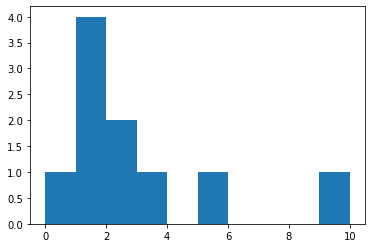

In [9]:
plt.hist(X[:,1]);

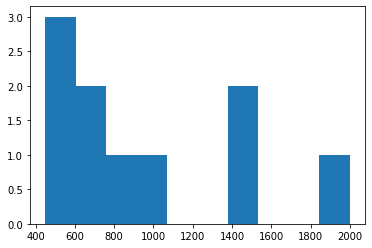

In [10]:
plt.hist(X[:,2]);

In [11]:
X1_mean = X[:,1].mean()
X1_mean

2.6

In [12]:
X1_std = X[:,1].std()
X1_std

2.8000000000000003

In [13]:
X_st = X.copy().astype(np.float64)

In [14]:
X_st[:,1] = (X[:,1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00, -5.71428571e-01,  5.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  7.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  7.50000000e+02,
         2.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  6.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  1.42857143e-01,  1.45000000e+03,
         2.00000000e+00],
       [ 1.00000000e+00, -9.28571429e-01,  8.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  8.57142857e-01,  1.50000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00,  2.64285714e+00,  2.00000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  4.50000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  1.00000000e+03,
         2.00000000e+00]])

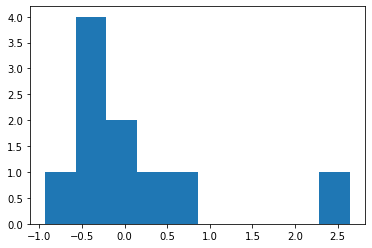

In [15]:
plt.hist(X_st[:,1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[:,2] = custom_StandardScaler(X[:,2])

In [18]:
X_st[:,3] = custom_StandardScaler(X[:,3])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.89625816],
       [ 1.        , -0.57142857, -0.56713087, -0.89625816],
       [ 1.        , -0.21428571, -0.46401617,  0.38411064],
       [ 1.        , -0.57142857, -0.77336028, -0.89625816],
       [ 1.        ,  0.14285714,  0.97958969,  0.38411064],
       [ 1.        , -0.92857143, -0.36090146, -0.89625816],
       [ 1.        ,  0.85714286,  1.08270439,  1.66447944],
       [ 1.        ,  2.64285714,  2.11385144,  1.66447944],
       [ 1.        , -0.57142857, -1.08270439, -0.89625816],
       [ 1.        , -0.21428571,  0.05155735,  0.38411064]])

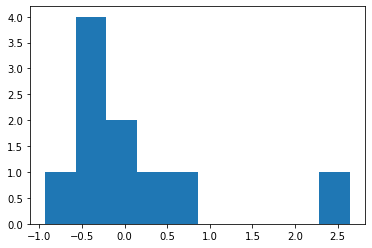

In [19]:
plt.hist(X_st[:,1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [22]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 97.52881369762615, веса: [50.0047313   3.99808842  3.20931495  4.40111188]
# итерация: 200, MSE: 41.303725368548584, веса: [56.41924275  4.43369152  2.93815892  4.27823851]
# итерация: 300, MSE: 40.14029897833505, веса: [57.26993241  4.76837878  2.6979966   4.1862711 ]
# итерация: 400, MSE: 40.006795130622564, веса: [57.38275049  5.03400811  2.49524574  4.125514  ]
# итерация: 500, MSE: 39.93055746958076, веса: [57.39771238  5.2454086   2.32430416  4.08689705]
# итерация: 600, MSE: 39.88049621100866, веса: [57.39969662  5.41408978  2.18032663  4.06378499]
# итерация: 700, MSE: 39.847234991653444, веса: [57.39995977  5.5490311   2.05916827  4.05137139]
# итерация: 800, MSE: 39.82497506673528, веса: [57.39999466  5.65725486  1.95729344  4.04619632]
# итерация: 900, MSE: 39.809983099909616, веса: [57.39999929  5.74426629  1.87169358  4.04578791]
# итерация: 1000, MSE: 39.79983007862337, веса: [57.39999991  5.81439207  1.79981404  4.04839662]


array([57.39999991,  5.81439207,  1.79981404,  4.04839662])

In [23]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 40.86349801695577, веса: [57.39623443  5.37179364  2.41604717  3.89317365]
# итерация: 1000, MSE: 39.384789224667756, веса: [57.39814026  5.8544652   1.82814859  4.00356762]
# итерация: 1500, MSE: 38.743849489294504, веса: [57.39792691  6.03207127  1.58687882  4.06953064]
# итерация: 2000, MSE: 38.471924238485414, веса: [57.397844    6.09969775  1.4883217   4.10144093]
# итерация: 2500, MSE: 38.35835468721858, веса: [57.39781126  6.12605753  1.44817237  4.11563932]
# итерация: 3000, MSE: 38.31143694437979, веса: [57.3977982   6.1364902   1.43184339  4.12170428]
# итерация: 3500, MSE: 38.29218918750996, веса: [57.39779295  6.14065922  1.42520877  4.12423897]
# итерация: 4000, MSE: 38.284327094635, веса: [57.39779084  6.14233519  1.42251462  4.12528534]
# итерация: 4500, MSE: 38.281124217345024, веса: [57.39778998  6.1430114   1.42142098  4.12571425]
# итерация: 5000, MSE: 38.27982153360792, веса: [57.39778963  6.14328483  1.42097713  4.12588934]


array([57.39778963,  6.14328483,  1.42097713,  4.12588934])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [25]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [26]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253416, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406398, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.782405042800356, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.77852356578891, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617127, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.777779304702605, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405892, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321603, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.77775502451415, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.777754760507705, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [43]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-100)

# итерация: 500, MSE: 39.981548483401845, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257850026, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.78234065772861, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.7784890595904, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771875846, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334799395, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.77774657959479, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528788, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035882, веса: [57.4         6.12221275  1.4287921   4.11624295]


array([57.4       ,  6.12221275,  1.4287921 ,  4.11624295])

# итерация: 500, MSE: 39.981548483401845, веса: [57.3976656   5.10794282  2.46013454  4.08693806]
# итерация: 1000, MSE: 39.80712257850026, веса: [57.3999999   5.76653146  1.85622321  4.03914637]
# итерация: 1500, MSE: 39.78234065772861, веса: [57.4         5.99153676  1.60432664  4.06912267]
# итерация: 2000, MSE: 39.7784890595904, веса: [57.4         6.07258433  1.50040894  4.09331596]
# итерация: 2500, MSE: 39.77786771875846, веса: [57.4         6.10298573  1.45781125  4.10606673]
# итерация: 3000, MSE: 39.77776605539443, веса: [57.4         6.1147209   1.44041502  4.11195715]
# итерация: 3500, MSE: 39.777749334799395, веса: [57.4         6.11933808  1.43332642  4.11452273]
# итерация: 4000, MSE: 39.77774657959479, веса: [57.4         6.12117707  1.43044178  4.11560688]
# итерация: 4500, MSE: 39.77774612528788, веса: [57.4         6.12191514  1.42926882  4.11605745]
# итерация: 5000, MSE: 39.77774605035882, веса: [57.4         6.12221275  1.4287921   4.11624295]


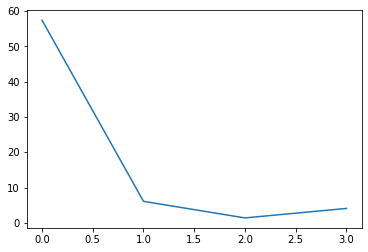

In [45]:
plt.plot(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-100));

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  

Думаю что да. 

#### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

Производная от переменной равна 1.

In [46]:
def eval_model_reg_L1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_*1) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [47]:
eval_model_reg_L1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98154941551958, веса: [57.3976156   5.1079238   2.46011932  4.08691809]
# итерация: 1000, MSE: 39.807123025113, веса: [57.3999499   5.7665119   1.85620919  4.03912573]
# итерация: 1500, MSE: 39.78234087397775, веса: [57.39995     5.99151695  1.6043131   4.06910178]
# итерация: 2000, MSE: 39.778489156608316, веса: [57.39995     6.07256441  1.5003956   4.09329498]
# итерация: 2500, MSE: 39.777867762447165, веса: [57.39995     6.10296577  1.45779798  4.10604572]
# итерация: 3000, MSE: 39.77776607647357, веса: [57.39995     6.11470092  1.44040178  4.11193613]
# итерация: 3500, MSE: 39.777749346505985, веса: [57.39995     6.11931809  1.4333132   4.1145017 ]
# итерация: 4000, MSE: 39.777746587455425, веса: [57.39995     6.12115708  1.43042856  4.11558584]
# итерация: 4500, MSE: 39.777746131578134, веса: [57.39995     6.12189515  1.42925561  4.11603642]
# итерация: 5000, MSE: 39.777746056009406, веса: [57.39995     6.12219276  1.42877888  4.11622191]


array([57.39995   ,  6.12219276,  1.42877888,  4.11622191])